In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#importing dataset:
dataframe = pd.read_csv("CarsData.csv")
dataframe


,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,7999,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...
97707,Fiesta,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3 Series,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


In [7]:
#one hot encoding for Fuel Type so that we can use it in our analysis:
fuel_Type = pd.get_dummies(dataframe, columns=["fuelType"], prefix="Is")

In [11]:
#defining our dependent and independent variables:
y = dataframe["price"]
x = [dataframe["mileage"],fuel_Type["Is_Diesel"], fuel_Type["Is_Petrol"], fuel_Type["Is_Hybrid"],dataframe["tax"],dataframe["mpg"],dataframe["engineSize"]]

In [14]:
# Combine the features into a single DataFrame
x = pd.concat([dataframe["mileage"], fuel_Type["Is_Diesel"], fuel_Type["Is_Petrol"], fuel_Type["Is_Hybrid"], dataframe["tax"], dataframe["mpg"], dataframe["engineSize"]], axis=1)

In [15]:
#splittig the dataset so that we can use it for training and testing:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#displaying the shape of the training and testing sets:
print("Training set X:", X_train.shape, "and Y:", Y_train.shape)
print("Testing set X:", X_test.shape, "and Y:", Y_test.shape)

Training set X: (68398, 7) and Y: (68398,)
Testing set X: (29314, 7) and Y: (29314,)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Training the model:
model = LinearRegression()
model.fit(X_train, Y_train)

#making predictions:
y_pred = model.predict(X_test)
y_pred

#evaluating the model:
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test,y_pred)

print("MSE is:", mse,"and r2 is:", r2 )

MSE is: 34072405.85813499 and r2 is: 0.6531577175160103


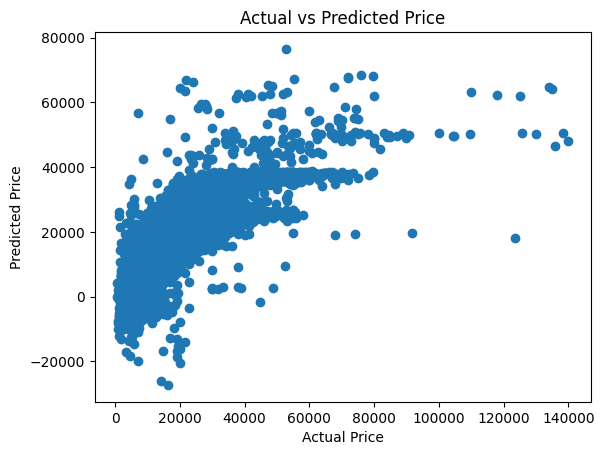

In [17]:
# Plotting the actual values
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

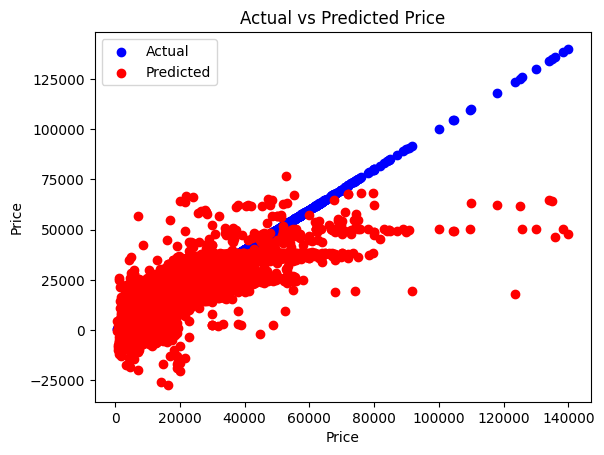

In [18]:
import matplotlib.pyplot as plt

# Plotting the actual values
plt.scatter(Y_test, Y_test, color='blue', label='Actual')

# Plotting the predicted values
plt.scatter(Y_test, y_pred, color='red', label='Predicted')

plt.xlabel('Price')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()